In [143]:
import pandas as pd
import heapq

In [144]:
df = pd.read_csv("data/rotten_tomatoes_movies.csv")

df.head(3)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8


In [145]:
df = df.drop(["rotten_tomatoes_link", "movie_info", "critics_consensus", "original_release_date"], axis=1)
df.head(3)

,movie_title,content_rating,genres,directors,authors,actors,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,10,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8


<Axes: ylabel='Frequency'>

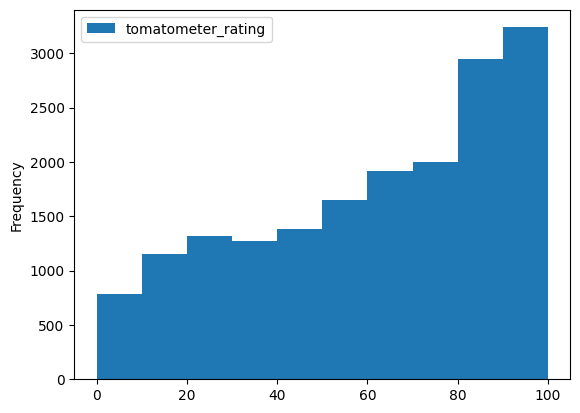

In [146]:
df.plot(y='tomatometer_rating', kind='hist')

In [147]:
vals = df['content_rating'].value_counts()
print(vals)

print()

for val in vals.keys():
  rating = df[df['content_rating'] == val]
  print(f"Average rating of {round(rating['tomatometer_rating'].mean(), 2)} for movies rated {val} ({len(rating)} movies)")


content_rating
R        6377
NR       5474
PG-13    2979
PG       2168
G         676
NC17       38
Name: count, dtype: int64

Average rating of 55.35 for movies rated R (6377 movies)
Average rating of 72.64 for movies rated NR (5474 movies)
Average rating of 50.13 for movies rated PG-13 (2979 movies)
Average rating of 59.56 for movies rated PG (2168 movies)
Average rating of 69.45 for movies rated G (676 movies)
Average rating of 68.53 for movies rated NC17 (38 movies)


In [148]:
vals = df['production_company'].value_counts()

print()
print('Biggest Production Companies')
for val in vals.keys()[:10]:
  rating = df[df['production_company'] == val]
  print(f"\tAverage rating of {round(rating['tomatometer_rating'].mean(), 2)} for movies produced by {val} ({len(rating)} movies)")

print()

vals1 = []
vals2 = []
for val in vals.keys():
  rating = df[df['production_company'] == val]
  avg = round(rating['tomatometer_rating'].mean(), 2)
  vals1.append({
      'name': val, 
      'average': avg, 
      'count': len(rating)
    })
  if len(rating) > 20:
    vals2.append({
      'name': val, 
      'average': avg, 
      'count': len(rating)
    })

print('Most Highly Rated Production Companies')
best_rated_producers = heapq.nlargest(5, vals1, key=lambda l: l['average'])
for x in best_rated_producers:
  print(f"\t{x['name']}: {x['average']} ({x['count']} movies)")

print()
print('Most Highly Rated Production Companies with > 20 movies')
best_rated_producers = heapq.nlargest(5, vals2, key=lambda l: l['average'])
for x in best_rated_producers:
  print(f"\t{x['name']}: {x['average']} ({x['count']} movies)")


Biggest Production Companies
	Average rating of 60.36 for movies produced by Paramount Pictures (517 movies)
	Average rating of 57.02 for movies produced by Warner Bros. Pictures (509 movies)
	Average rating of 57.71 for movies produced by Universal Pictures (495 movies)
	Average rating of 52.83 for movies produced by 20th Century Fox (423 movies)
	Average rating of 64.26 for movies produced by IFC Films (413 movies)
	Average rating of 52.04 for movies produced by Sony Pictures Home Entertainment (388 movies)
	Average rating of 52.71 for movies produced by Warner Home Video (369 movies)
	Average rating of 71.18 for movies produced by Netflix (357 movies)
	Average rating of 58.67 for movies produced by MGM (279 movies)
	Average rating of 75.43 for movies produced by Sony Pictures Classics (262 movies)

Most Highly Rated Production Companies
	Comedy Dynamics: 100.0 (3 movies)
	Ealing Studios: 100.0 (2 movies)
	Rialto: 100.0 (2 movies)
	Park Circus: 100.0 (2 movies)
	Atlas Films: 100.0 (